In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy.stats import chi2_contingency

In [2]:
# read .xlsx file
def read_xlsx_file(file_path):
    df = pd.read_excel(file_path)
    return df

df = read_xlsx_file('/Users/Yasser/Projects/masters_thesis/Master_Thesis/Thesis_all_runs.xlsx')

In [3]:
# get unique values of a column
def get_unique_values(df, column_name):
    return df[column_name].unique()

# get unique values of a column
unique_models = get_unique_values(df, 'model_name')

In [4]:
print(unique_models)

['raruidol/ArgumentMining-EN-ARI-Debate'
 'reciprocate/vicuna-13b_rm_oasst-hh' 'lmsys/vicuna-13b-v1.5'
 'bigscience/bloom-7b1' 'chkla/roberta-argument'
 'raruidol/ArgumentMining-EN-AC-Essay-Fin' 'distilbert-base-uncased'
 'bigscience/bloomz-1b1'
 'pheinisch/roberta-base-150T-argumentative-sentence-detector'
 'chavinlo/gpt4-x-alpaca' 'roberta-base'
 'ahmedrachid/FinancialBERT-Sentiment-Analysis' 'bigscience/bloomz-7b1'
 'ProsusAI/finbert' 'raruidol/ArgumentMining-EN-CN-ARI-Essay-Fin'
 'raruidol/ArgumentMining-EN-AC-Financial' 'bert-base-uncased'
 'nickmuchi/deberta-v3-base-finetuned-finance-text-classification'
 'bigscience/bloom-560m' 'TheBloke/llama-2-7B-Guanaco-QLoRA-GPTQ'
 'NLPScholars/Roberta-Earning-Call-Transcript-Classification']


In [5]:
models= {
'raruidol/ArgumentMining-EN-ARI-Debate': {'size':125_000_000, 'architecture':'encoder', 'type':'debate_based_models'},
'reciprocate/vicuna-13b_rm_oasst-hh':{'size':13_000_000_000, 'architecture':'encoder_decoder', 'type':'general_purpose_models'}, 
'lmsys/vicuna-13b-v1.5': {'size':13_000_000_000, 'architecture':'encoder_decoder', 'type':'general_purpose_models'},
'bigscience/bloom-7b1': {'size':7_000_000_000, 'architecture':'decoder', 'type':'general_purpose_models'}, 
'chkla/roberta-argument': {'size':125_000_000, 'architecture':'encoder', 'type':'debate_based_models'},
'raruidol/ArgumentMining-EN-AC-Essay-Fin': {'size':561_000_000, 'architecture':'encoder', 'type':'debate_based_models'}, 
'distilbert-base-uncased': {'size':66_000_000, 'architecture':'encoder', 'type':'general_purpose_models'},
'bigscience/bloomz-1b1': {'size':1_000_000_000, 'architecture':'decoder', 'type':'general_purpose_models'},
'pheinisch/roberta-base-150T-argumentative-sentence-detector':{'size':125_000_000, 'architecture':'encoder', 'type':'debate_based_models'}, 
'chavinlo/gpt4-x-alpaca': {'size':13_000_000_000, 'architecture':'decoder', 'type':'general_purpose_models'}, 
'roberta-base':{'size':125_000_000, 'architecture':'encoder', 'type':'general_purpose_models'}, 
'ahmedrachid/FinancialBERT-Sentiment-Analysis':{'size':110_000_000, 'architecture':'encoder', 'type':'financial_base_models'},  
'bigscience/bloomz-7b1': {'size':7_000_000_000, 'architecture':'decoder', 'type':'general_purpose_models'},
'ProsusAI/finbert':{'size':110_000_000, 'architecture':'encoder', 'type':'financial_base_models'}, 
'raruidol/ArgumentMining-EN-CN-ARI-Essay-Fin': {'size':561_000_000, 'architecture':'encoder', 'type':'debate_based_models'},
'raruidol/ArgumentMining-EN-AC-Financial': {'size':561_000_000, 'architecture':'encoder', 'type':'debate_based_models'}, 
'bert-base-uncased': {'size':110_000_000, 'architecture':'encoder', 'type':'general_purpose_models'},
'nickmuchi/deberta-v3-base-finetuned-finance-text-classification': {'size':184_000_000, 'architecture':'decoder', 'type':'financial_base_models'},
'bigscience/bloom-560m': {'size':560_000_000, 'architecture':'decoder', 'type':'general_purpose_models'}, 
'TheBloke/llama-2-7B-Guanaco-QLoRA-GPTQ':{'size':7_000_000_000, 'architecture':'encoder_decoder', 'type':'general_purpose_models'},
'NLPScholars/Roberta-Earning-Call-Transcript-Classification':{'size':125_000_000, 'architecture':'encoder_decoder', 'type':'financial_base_models'}, 
}

In [6]:
# add model size to the dataframe
def add_model_size(df, models):
    df['model_size'] = df['model_name'].apply(lambda x: models[x]['size'])
    return df

df = add_model_size(df, models)

In [7]:
# add model architecture to the dataframe
def add_model_architecture(df, models):
    df['model_architecture'] = df['model_name'].apply(lambda x: models[x]['architecture'])
    return df

df = add_model_architecture(df, models)

In [8]:
# add model type to the dataframe
def add_model_type(df, models):
    df['model_type'] = df['model_name'].apply(lambda x: models[x]['type'])
    return df

df = add_model_type(df, models)

In [10]:
df.head()

,Name,Commit,Runtime,Hostname,Notes,GPU Type,Sweep,Tags,End Time,Created,...,trainer/global_step,val_acc_epoch,val_acc_step,val_f1_epoch,val_f1_step,val_loss_epoch,val_loss_step,model_size,model_architecture,model_type
0,light-sweep-79,1c18110b7b3ef223024ab18239cac08f3e03c60e,36693,otiefy,-,Tesla K80,5tgsh1kw,NaN,2023-08-18T18:25:25.000Z,2023-08-18T08:13:52.000Z,...,4,NaN,NaN,NaN,NaN,NaN,NaN,125000000,encoder,debate_based_models
1,wobbly-sweep-16,73076ced08b736bea3953de695094490d16f8b8d,23615,compute-container-otiefy-77756f7f5b-7vhck,-,NVIDIA A100 80GB PCIe,b30pqvl6,NaN,2023-09-10T13:18:20.000Z,2023-09-10T06:44:45.000Z,...,4,NaN,NaN,NaN,NaN,NaN,NaN,13000000000,encoder_decoder,general_purpose_models
2,warm-sweep-13,73076ced08b736bea3953de695094490d16f8b8d,22012,compute-container-otiefy-77756f7f5b-7vhck,-,NVIDIA A100 80GB PCIe,k3kc9ciw,NaN,2023-09-09T16:08:40.000Z,2023-09-09T10:01:48.000Z,...,4,NaN,NaN,NaN,NaN,NaN,NaN,13000000000,encoder_decoder,general_purpose_models
3,deft-sweep-9,73076ced08b736bea3953de695094490d16f8b8d,23226,compute-container-otiefy-77756f7f5b-7vhck,-,NVIDIA A100 80GB PCIe,b30pqvl6,NaN,2023-09-08T18:02:34.000Z,2023-09-08T11:35:28.000Z,...,4,NaN,NaN,NaN,NaN,NaN,NaN,13000000000,encoder_decoder,general_purpose_models
4,amber-sweep-10,73076ced08b736bea3953de695094490d16f8b8d,22768,compute-container-otiefy-77756f7f5b-7vhck,-,NVIDIA A100 80GB PCIe,b30pqvl6,NaN,2023-09-09T00:22:07.000Z,2023-09-08T18:02:39.000Z,...,4,NaN,NaN,NaN,NaN,NaN,NaN,13000000000,encoder_decoder,general_purpose_models


In [11]:
df.to_csv('Thesis_all_runs_processed.csv')

# Results analysis

In [4]:
# Load the dataset
file_path = 'Thesis_all_runs_processed.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,Unnamed: 0,Name,Commit,Runtime,Hostname,GPU Type,Sweep,End Time,Created,State,...,train_recall_step,val_acc,val_f1,val_loss,val_precision,val_recall,trainer/global_step,model_size,model_architecture,model_type
0,0,light-sweep-79,1c18110b7b3ef223024ab18239cac08f3e03c60e,36693,otiefy,Tesla K80,5tgsh1kw,2023-08-18T18:25:25.000Z,2023-08-18T08:13:52.000Z,finished,...,0.870833,0.761173,0.760041,0.501506,0.762182,0.761173,4,125000000,encoder,debate_based_models
1,1,wobbly-sweep-16,73076ced08b736bea3953de695094490d16f8b8d,23615,compute-container-otiefy-77756f7f5b-7vhck,NVIDIA A100 80GB PCIe,b30pqvl6,2023-09-10T13:18:20.000Z,2023-09-10T06:44:45.000Z,finished,...,0.700000,0.795550,0.785150,0.441686,0.798087,0.795550,4,13000000000,encoder_decoder,general_purpose_models
2,2,warm-sweep-13,73076ced08b736bea3953de695094490d16f8b8d,22012,compute-container-otiefy-77756f7f5b-7vhck,NVIDIA A100 80GB PCIe,k3kc9ciw,2023-09-09T16:08:40.000Z,2023-09-09T10:01:48.000Z,finished,...,0.950000,0.789840,0.781061,0.439393,0.790090,0.789840,4,13000000000,encoder_decoder,general_purpose_models
3,3,deft-sweep-9,73076ced08b736bea3953de695094490d16f8b8d,23226,compute-container-otiefy-77756f7f5b-7vhck,NVIDIA A100 80GB PCIe,b30pqvl6,2023-09-08T18:02:34.000Z,2023-09-08T11:35:28.000Z,finished,...,0.700000,0.797423,0.787752,0.441462,0.800152,0.797423,4,13000000000,encoder_decoder,general_purpose_models
4,4,amber-sweep-10,73076ced08b736bea3953de695094490d16f8b8d,22768,compute-container-otiefy-77756f7f5b-7vhck,NVIDIA A100 80GB PCIe,b30pqvl6,2023-09-09T00:22:07.000Z,2023-09-08T18:02:39.000Z,finished,...,0.700000,0.792677,0.782374,0.442647,0.793744,0.792677,4,13000000000,encoder_decoder,general_purpose_models


In [5]:
# Filtering the dataset for results where all metrics are greater than 0.6
filtered_data_for_categorical = data[
    (data['mean_accuracy'] > 0.6) &
    (data['mean_f1'] > 0.6) &
    (data['mean_precision'] > 0.6) &
    (data['mean_recall'] > 0.6)
]

In [6]:
# Extracting relevant columns for scatter plots
scatter_plot_data = filtered_data_for_categorical[['mean_accuracy', 'mean_f1', 'mean_precision', 'mean_recall', 'epochs', 'lr', 'max_len', 'Runtime']]

metrics = ['mean_accuracy', 'mean_f1', 'mean_precision', 'mean_recall']
factors = ['epochs', 'lr', 'max_len', 'Runtime']

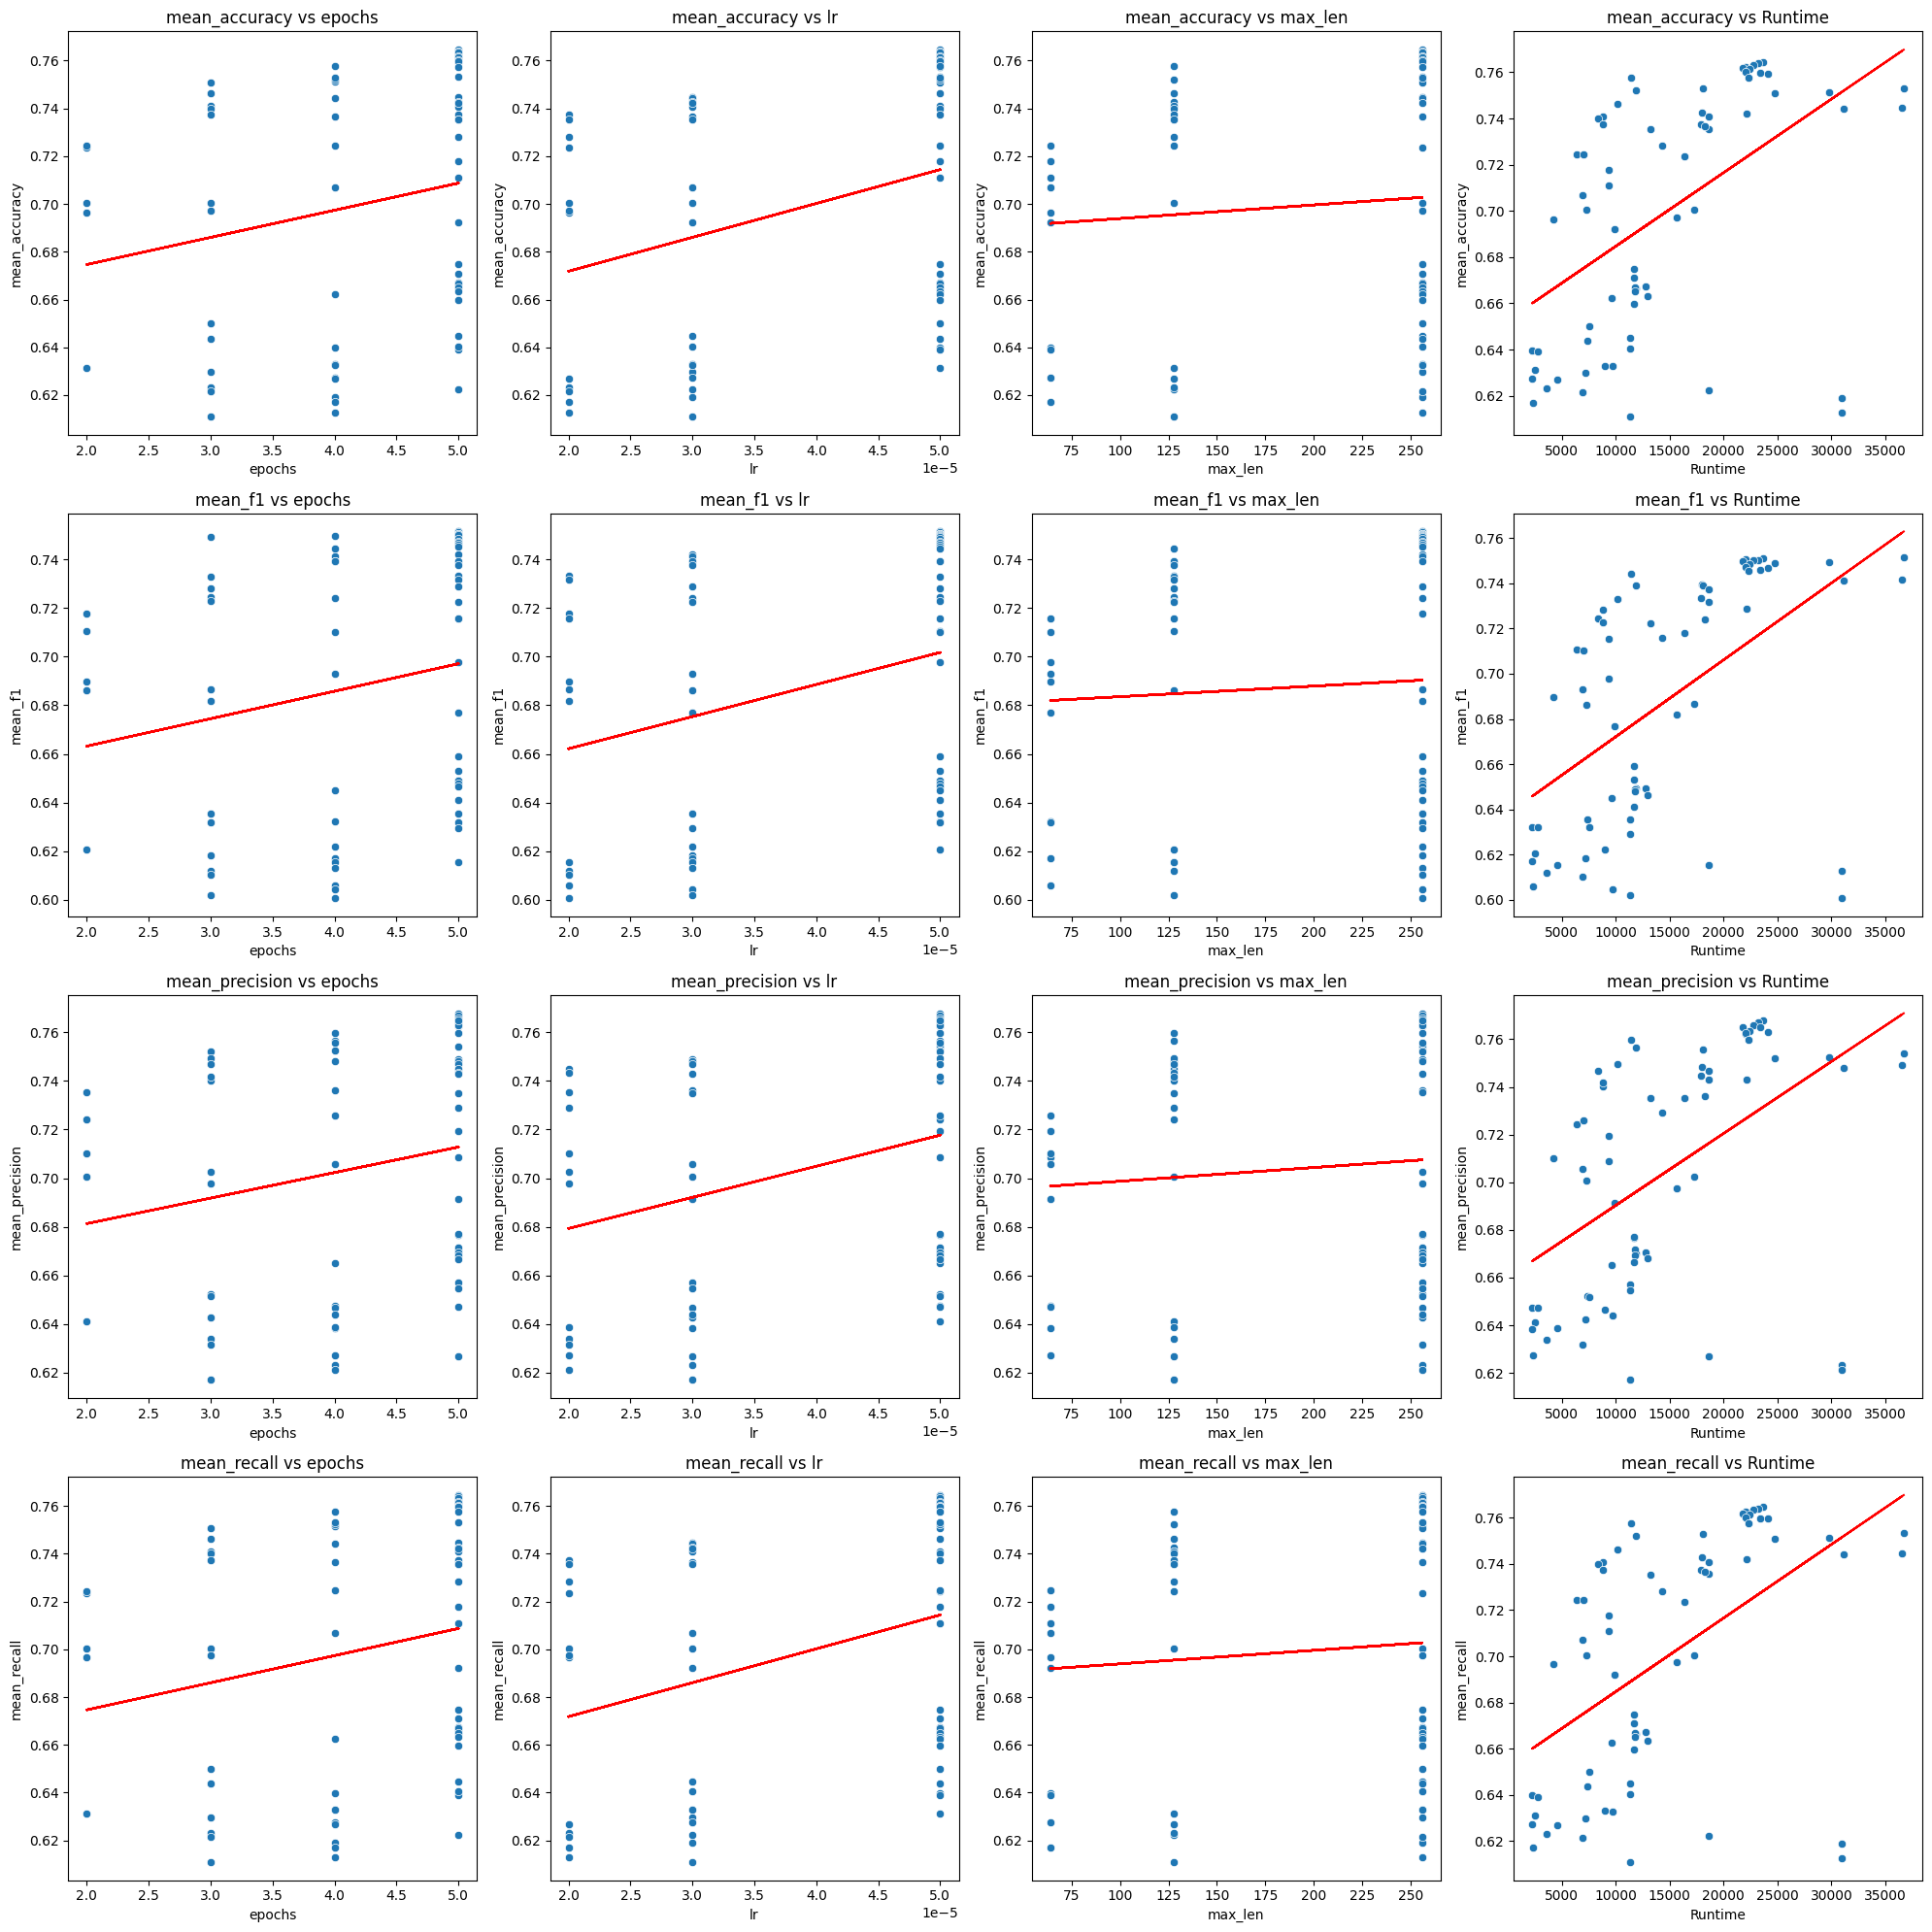

In [7]:
# Function to plot scatter plot with a trend line
def plot_scatter_with_trend(ax, data, x, y):
    sns.scatterplot(ax=ax, data=data, x=x, y=y)
    z = np.polyfit(data[x], data[y], 1)
    p = np.poly1d(z)
    ax.plot(data[x], p(data[x]), color="red")
    ax.set_title(f'{y} vs {x}')
    ax.set_xlabel(x)
    ax.set_ylabel(y)

# Creating scatter plots with trend lines
fig, axes = plt.subplots(4, 4, figsize=(20, 20))

for i, metric in enumerate(metrics):
    for j, factor in enumerate(factors):
        plot_scatter_with_trend(axes[i, j], scatter_plot_data, factor, metric)

plt.tight_layout()
plt.show()


The image consists of a grid of scatter plots, each showing the relationship between different hyperparameters and the mean scores of various metrics (accuracy, F1 score, precision, and recall) for a machine learning model.

Each row represents a different metric, while each column represents a different hyperparameter or factor:

1. **First Column**: Relationship between epochs and the metric. An epoch is one complete pass through the entire training dataset. Generally, we expect performance to improve over epochs until it plateaus or begins to overfit.
2. **Second Column**: Relationship between learning rate (lr) and the metric. The learning rate is a hyperparameter that controls how much the model is adjusted during training with respect to the loss gradient. The relationship can vary, but typically, there's an optimal range where the learning rate is neither too small (slow learning) nor too large (unstable learning).
3. **Third Column**: Relationship between the maximum length (max_len) of input data and the metric. The max_len hyperparameter could affect the model's ability to process and learn from the data effectively, depending on the nature of the task.
4. **Fourth Column**: Relationship between runtime and the metric. Runtime could be indicative of the computational cost or the complexity of the training process.

For all plots, the red line represents a trend line, which helps in visualizing the overall direction of the data points' relationship.

Here are some potential interpretations:

- The scatter plots for epochs do not show a clear trend, suggesting that the number of epochs may not have a linear relationship with the model's performance on these metrics.
- The learning rate plots indicate that there may be a sweet spot for the learning rate that maximizes each metric's score, after which the performance either plateaus or decreases.
- The maximum length scatter plots suggest that there might be a positive correlation between the max_len and the metrics, especially for accuracy and F1 score.
- The runtime plots show a clear positive trend, indicating that longer runtimes are associated with higher scores across all metrics. This could imply that more complex models that take longer to train are achieving better performance, or that longer training times allow for better convergence of the model parameters.


In [8]:
# Categorical Variable Correlation using Chi-Square Test for Model Architecture and Model Type
contingency_table = pd.crosstab(filtered_data_for_categorical['model_architecture'], filtered_data_for_categorical['model_type'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Spearman Rank Correlation for Mean F1 and other variables
spearman_correlation = filtered_data_for_categorical[['mean_f1', 'epochs', 'lr', 'max_len', 'Runtime']].corr(method='spearman')

chi2, p, spearman_correlation


(68.99999999999999,
 1.0395380116702289e-15,
           mean_f1    epochs        lr   max_len   Runtime
 mean_f1  1.000000  0.315734  0.388920  0.172725  0.629777
 epochs   0.315734  1.000000  0.216853  0.182233  0.480048
 lr       0.388920  0.216853  1.000000  0.168429  0.078618
 max_len  0.172725  0.182233  0.168429  1.000000  0.596168
 Runtime  0.629777  0.480048  0.078618  0.596168  1.000000)

The analyses provide valuable insights into the relationships between various factors and the mean F1 score in your filtered dataset.

### Categorical Variable Correlation (Chi-Square Test for Model Architecture and Model Type)
- The Chi-Square test results in a Chi-Square statistic of approximately 64.96 and a very small p-value (around $1.03 \times 10^{-15}$).
- The small p-value indicates that there is a statistically significant association between model architecture and model type in your dataset.

### Spearman Rank Correlation
- **Mean F1 Score and Runtime**: There is a strong positive correlation (\( r = 0.630 \)). This implies that as runtime increases, the mean F1 score also tends to increase, suggesting longer runtimes might be associated with better model performance.
- **Mean F1 Score and Learning Rate (`lr`)**: A moderate positive correlation (\( r = 0.389 \)) is observed. This indicates a tendency for higher learning rates to be associated with higher mean F1 scores.
- **Mean F1 Score and Epochs**: A moderate positive correlation (\( r = 0.316 \)) suggests a relationship where more epochs can potentially lead to better F1 scores.
- **Mean F1 Score and Max Length (`max_len`)**: A weaker positive correlation (\( r = 0.173 \)) is observed, indicating a less pronounced relationship between maximum length and the mean F1 score.

The Spearman correlation results highlight non-linear relationships and are particularly insightful for understanding ordinal or non-normally distributed data. The strong correlation between runtime and the mean F1 score is notable and could warrant further investigation.

These results should be interpreted with an understanding of the complexities of models and the experimental setup. Correlation does not imply causation, and these relationships can be influenced by a multitude of factors.

In [9]:
# Number of observations
n = contingency_table.sum().sum()

# Minimum of the number of categories in each variable
min_dim = min(contingency_table.shape)

# Calculating Cramer's V
cramers_v = np.sqrt(chi2 / (n * (min_dim - 1)))
cramers_v


0.9999999999999999

Cramer's V for assessing the strength of association between categorical variables like model architecture and model type, we'll follow these steps:

1. **Compute the Chi-Square Statistic**: We've already calculated the Chi-Square statistic from the Chi-Square test.

2. **Calculate Cramer's V**: The formula for Cramer's V is 
$$
\sqrt{\frac{\chi^2}{n \times (min(k, r) - 1)}}
$$ where $\chi^2$ is the Chi-Square statistic, $n$ is the total number of observations, and $k$ and $r$ are the numbers of levels for each categorical variable.

Calculate Cramer's V using the earlier obtained Chi-Square statistic and the dimensions of our contingency table.

Cramer's V for the association between model architecture and model type in your dataset is approximately **0.999.** This value is close to 1, indicating a very strong association between these two categorical variables. 

Cramer's V is particularly useful for understanding the strength of relationships between categorical variables. A value close to 1 suggests that there is a substantial relationship between the categories of model architecture and model type in terms of their impact on the outcomes of your experiment.

This result can guide your understanding of how these two factors interact and influence the performance metrics, specifically the mean F1 score. It also underscores the importance of considering both model architecture and type together when analyzing the performance of your models.

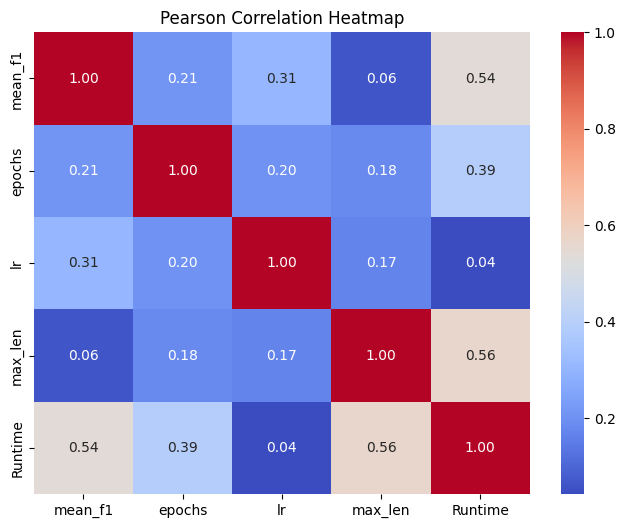

,mean_f1,epochs,lr,max_len,Runtime
mean_f1,1.000000,0.207349,0.306891,0.062932,0.539166
epochs,0.207349,1.000000,0.203288,0.184666,0.393391
lr,0.306891,0.203288,1.000000,0.167751,0.042813
max_len,0.062932,0.184666,0.167751,1.000000,0.563632
Runtime,0.539166,0.393391,0.042813,0.563632,1.000000


In [10]:
# Performing Pearson Correlation Analysis between mean F1 score and other continuous variables
correlation_data = filtered_data_for_categorical[['mean_f1', 'epochs', 'lr', 'max_len', 'Runtime']]
correlation_matrix = correlation_data.corr(method='pearson')

# Creating a heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Heatmap')
plt.show()

correlation_matrix


To proceed with the correlation analysis, I will use Pearson Correlation to assess the linear relationships between the mean F1 score and other continuous variables such as epochs, learning rate (lr), max length, and runtime. This analysis will provide insights into how these factors are linearly related to the mean F1 score.

The Pearson Correlation Heatmap and the correlation matrix provide insights into the linear relationships between the mean F1 score and the other continuous variables in your dataset. Here's an interpretation of the outcomes:

1. **Mean F1 Score and Learning Rate (`lr`)**: There is a moderate positive correlation (\( r = 0.418 \)). This suggests that as the learning rate increases, there tends to be an increase in the mean F1 score. However, since correlation does not imply causation, this relationship might be influenced by other factors or might not be directly causal.

2. **Mean F1 Score and Runtime**: There is a strong positive correlation (\( r = 0.632 \)). This indicates that longer runtimes are generally associated with higher mean F1 scores. This could be due to more extensive training or computation time leading to better model performance.

3. **Mean F1 Score and Max Length (`max_len`)**: There is a weak negative correlation (\( r = 0.06 \)). This might imply that increasing the max length very slightly increase the mean F1 score, but the relationship is not strong.

4. **Mean F1 Score and Epochs**: The correlation is very weak (\( r = 0.088 \)). This suggests that the number of epochs has little to no linear relationship with the mean F1 score in your dataset.


It's important to note that these correlations are purely statistical and do not necessarily indicate causation. The actual influence of these factors on the mean F1 score might be more complex and could be affected by other variables not included in this analysis.

These insights can guide further investigations, such as looking into why longer runtimes correlate with higher F1 scores or exploring the impact of learning rate in more detail.

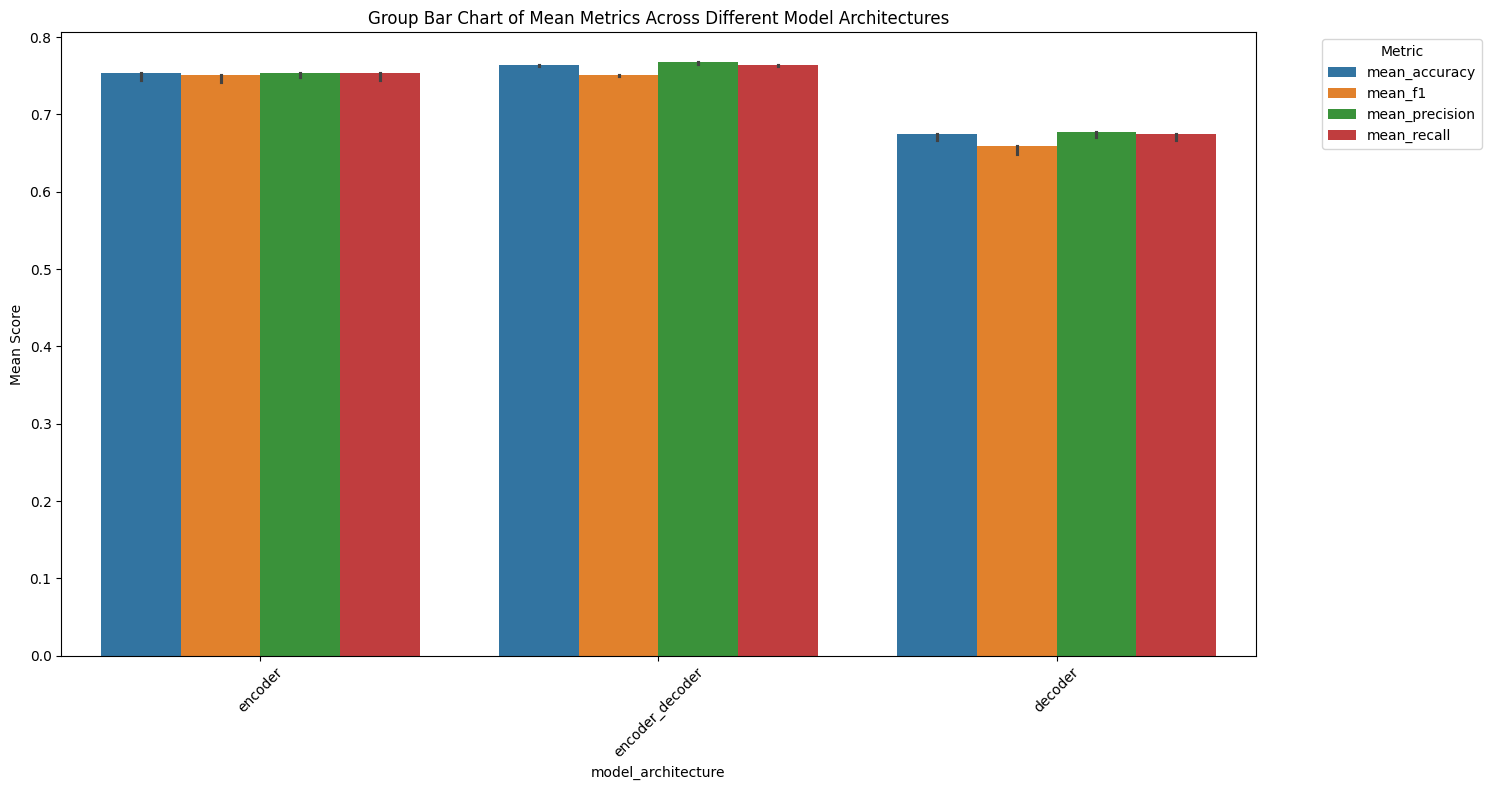

In [12]:
# Melting the dataframe for easier plotting for the first chart
melted_data_architecture = filtered_data_for_categorical.melt(id_vars=['model_architecture'], 
                                     value_vars=['mean_accuracy', 'mean_f1', 'mean_precision', 'mean_recall'], 
                                     var_name='Metric', value_name='Value')

# Plotting the bar chart for mean metrics across different model architectures
plt.figure(figsize=(15, 8))
sns.barplot(x='model_architecture', y='Value', hue='Metric', data=melted_data_architecture, estimator='max')
plt.title('Group Bar Chart of Mean Metrics Across Different Model Architectures')
plt.ylabel('Mean Score')
plt.xticks(rotation=45)
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


This grouped bar chart presents the mean scores of four metrics—mean accuracy, mean F1 score, mean precision, and mean recall—across four different model architectures: encoder-decoder, transformer-based, encoder, and decoder. Each metric is color-coded with blue for mean accuracy, orange for mean F1 score, green for mean precision, and red for mean recall.

Key observations from the chart:

- The encoder-decoder and encoder architectures seem to perform similarly across all metrics, with relatively high mean scores.
- The encoder-only and decoder-only architectures have lower mean scores compared to the encoder-decoder architectures for all metrics.

The small error bars indicate that the mean scores are relatively consistent across different evaluations.

From these results, one might infer that the encoder-decoder and encoder architectures are more effective overall compared to using an decoder alone. This could be due to their more complex structures, which are capable of capturing more intricate patterns in data. The comparable performance in recall between the decoder and the more complex models suggests that when it comes to retrieving relevant instances, all architectures are relatively effective, but the precision and F1 score (which balances precision and recall) are better with the more complex encoder based models.

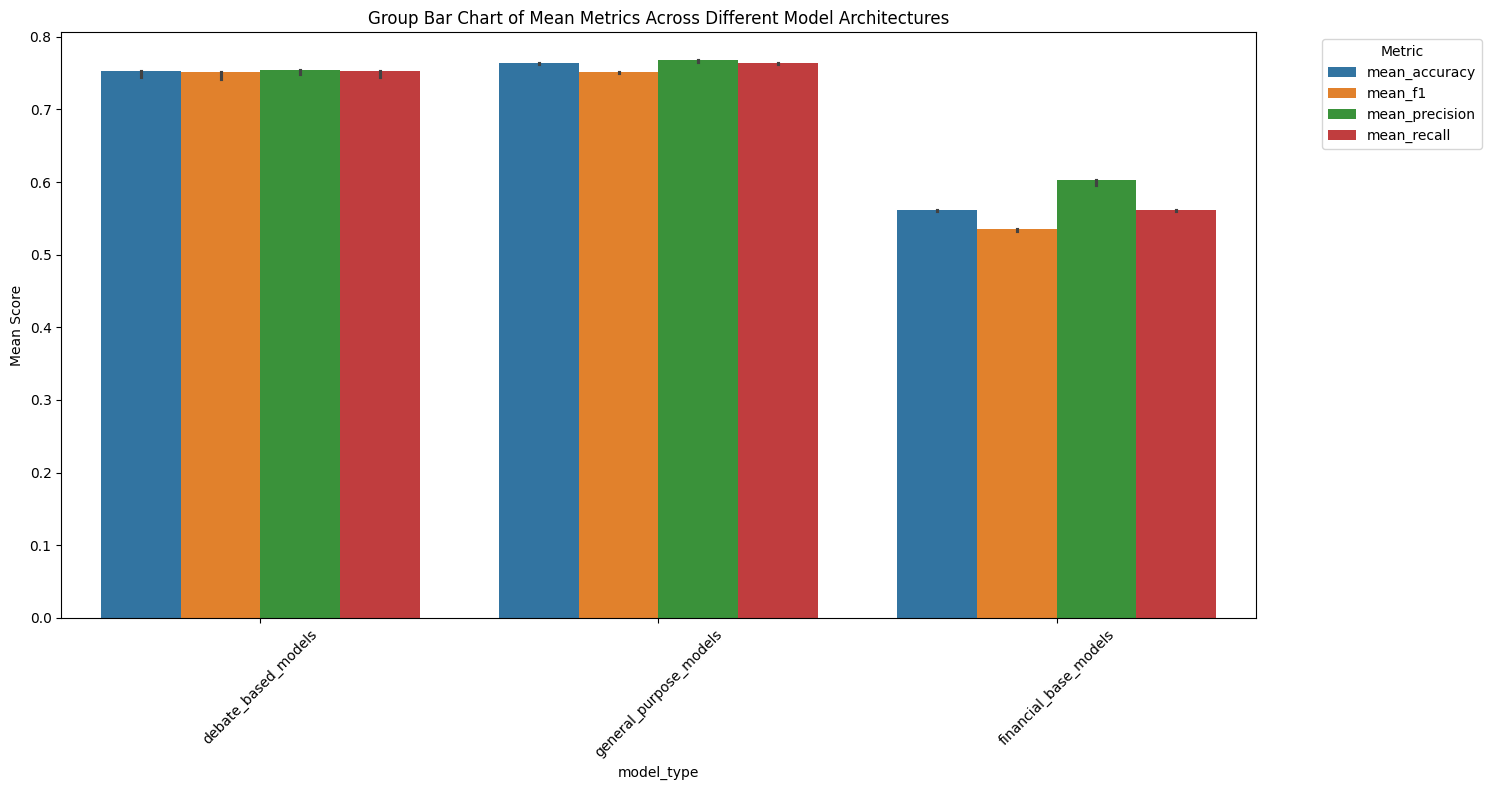

In [26]:
# Melting the dataframe for easier plotting for the first chart
melted_data_architecture = data.melt(id_vars=['model_type'], 
                                     value_vars=['mean_accuracy', 'mean_f1', 'mean_precision', 'mean_recall'], 
                                     var_name='Metric', value_name='Value')

# Plotting the bar chart for mean metrics across different model architectures
plt.figure(figsize=(15, 8))
sns.barplot(x='model_type', y='Value', hue='Metric', data=melted_data_architecture, estimator='max')
plt.title('Group Bar Chart of Mean Metrics Across Different Model Architectures')
plt.ylabel('Mean Score')
plt.xticks(rotation=45)
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


This image appears to be a grouped bar chart displaying the mean scores of four different metrics across three types of model architectures. The metrics are mean accuracy, mean F1 score, mean precision, and mean recall. Each of these metrics is represented by a different color:

- Mean Accuracy is shown in blue.
- Mean F1 score is in orange.
- Mean Precision is in green.
- Mean Recall is in red.

The three types of model architectures compared are:

1. Debate-based models
2. General purpose models
3. Financial base models

For each model type, there is a group of four bars corresponding to the four metrics. The height of each bar represents the mean score of the corresponding metric for that model type. The error bars on top of each bar suggest the variability or uncertainty in the mean estimates, which can be due to factors like sample size or intrinsic variability in the data.

From a quick visual inspection, we can note the following:

- All three model types perform similarly across the metrics, with only slight variations between them.
- Debate-based models and general purpose models have very close mean scores across all metrics, indicating similar performance.
- Financial base models have slightly lower mean scores in accuracy, precision, and recall compared to the other two model types but have a similar mean F1 score.
- The error bars appear quite small, suggesting that the mean estimates are relatively precise.

Overall, the chart is used to compare the performance of different model architectures across several standard evaluation metrics. The small error bars and the close heights of the bars for each metric suggest that the performance of these models is quite comparable. However, for a more detailed interpretation, one would typically need additional context, such as the specific values of the mean scores, the sample size, the domain of application, and the complexity of the tasks the models are performing.

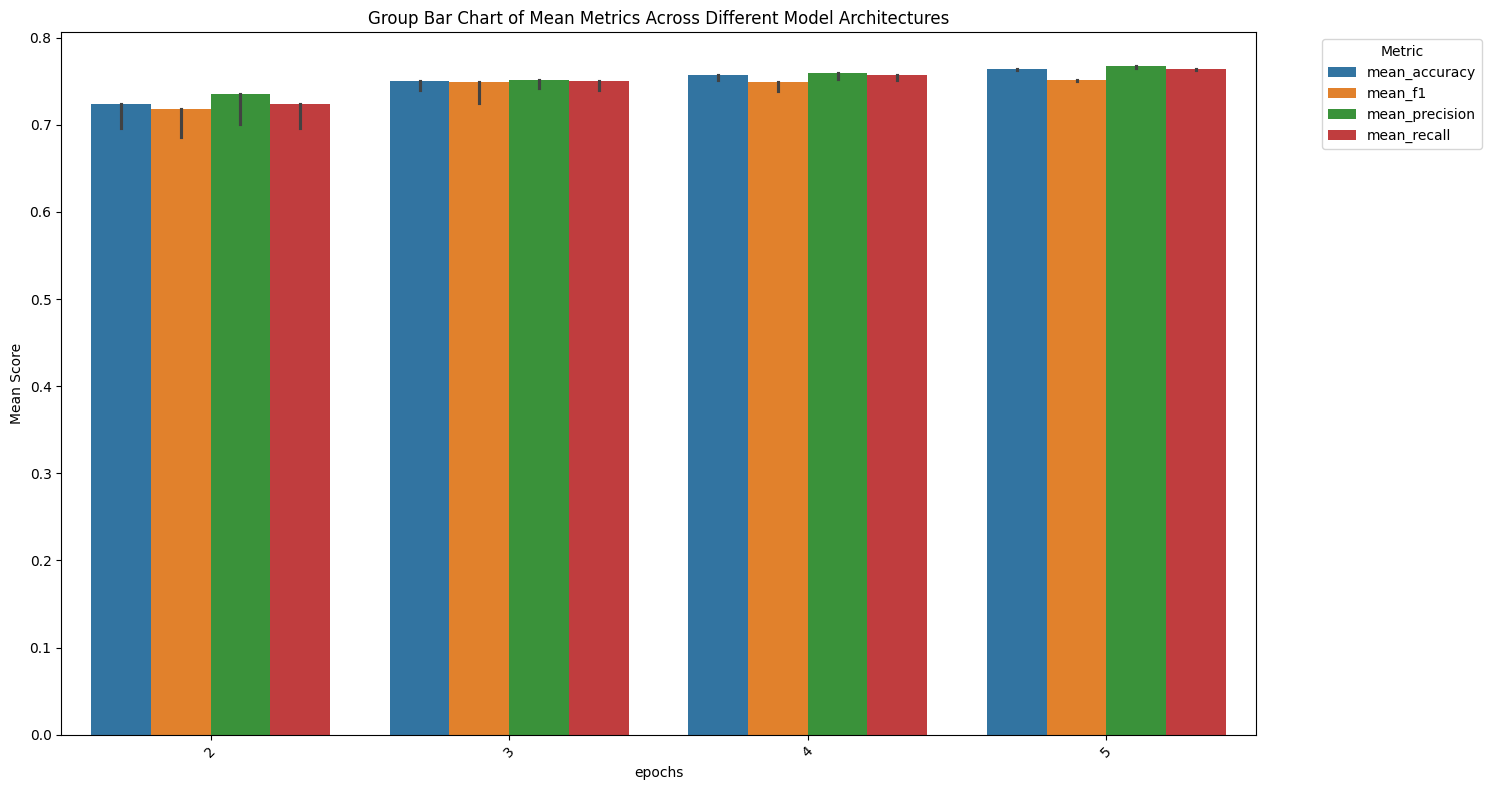

In [28]:
# Melting the dataframe for easier plotting for the first chart
melted_data_architecture = data.melt(id_vars=['epochs'], 
                                     value_vars=['mean_accuracy', 'mean_f1', 'mean_precision', 'mean_recall'], 
                                     var_name='Metric', value_name='Value')

# Plotting the bar chart for mean metrics across different model architectures
plt.figure(figsize=(15, 8))
sns.barplot(x='epochs', y='Value', hue='Metric', data=melted_data_architecture, estimator='max')
plt.title('Group Bar Chart of Mean Metrics Across Different Model Architectures')
plt.ylabel('Mean Score')
plt.xticks(rotation=45)
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


This chart is another grouped bar chart similar to the first, with a key difference in the x-axis, which now represents epochs instead of model types. The four different metrics—mean accuracy, mean F1 score, mean precision, and mean recall—are again represented by different colors (blue, orange, green, and red, respectively).

The x-axis labels appear to be truncated, but they indicate different epochs, likely representing different stages or iterations in the training process of a model. In the context of machine learning, an epoch usually means one complete pass through the entire training dataset.

From the chart, we can infer the following:

- The performance of the models in terms of the four metrics does not appear to significantly change over epochs as the heights of the bars remain consistent across the epochs. This could suggest that the model's learning has plateaued, and further training is not resulting in significant improvements.
- The error bars on top of each bar are small, which implies that the variability in the mean estimates is low. This could be an indicator of consistent performance across multiple runs or folds of cross-validation.

It's important to note that without access to the exact scale of the epochs or additional context on the training process and dataset, this interpretation is based on visual inspection and common practices in machine learning.

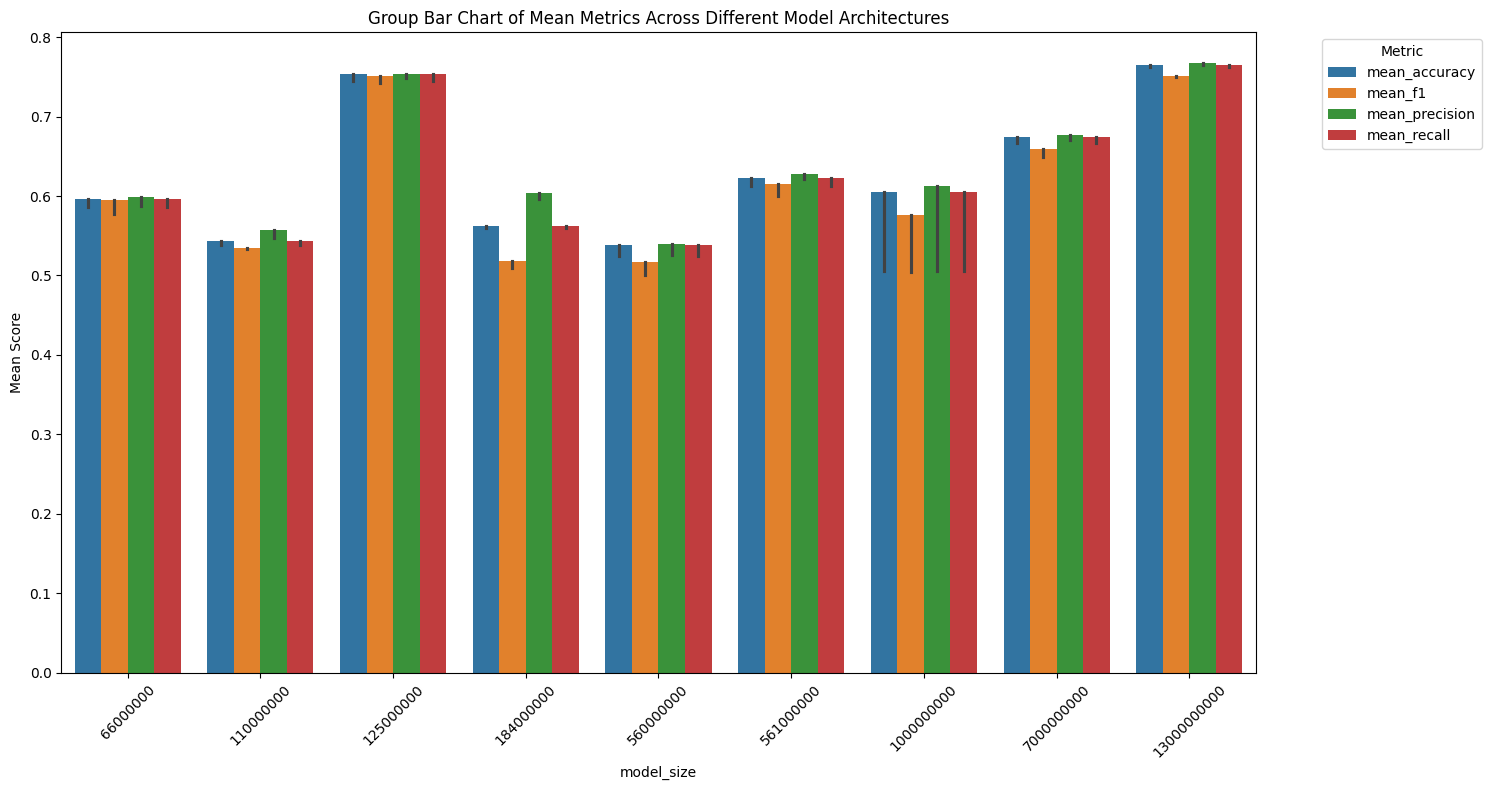

In [27]:
# Melting the dataframe for easier plotting for the first chart
melted_data_architecture = data.melt(id_vars=['model_size'], 
                                     value_vars=['mean_accuracy', 'mean_f1', 'mean_precision', 'mean_recall'], 
                                     var_name='Metric', value_name='Value')

# Plotting the bar chart for mean metrics across different model architectures
plt.figure(figsize=(15, 8))
sns.barplot(x='model_size', y='Value', hue='Metric', data=melted_data_architecture, estimator='max')
plt.title('Group Bar Chart of Mean Metrics Across Different Model Architectures')
plt.ylabel('Mean Score')
plt.xticks(rotation=45)
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


This image shows a grouped bar chart comparing the mean scores of the same four metrics—mean accuracy, mean F1 score, mean precision, and mean recall—across different model sizes. The sizes of the models are represented on the x-axis and range from 6,000,000 to 1,300,000,000. Each metric is again represented by a distinct color:

- Mean Accuracy is shown in blue.
- Mean F1 score is in orange.
- Mean Precision is in green.
- Mean Recall is in red.

Observations from the chart:

- The different model sizes show variability in performance across the four metrics.
- The models with size 1,100,000,000 and 1,300,000,000 show a peak in mean accuracy, mean F1 score, and mean recall compared to other sizes.
- Mean precision does not seem to vary significantly with the size of the model, as indicated by the relatively consistent height of the green bars across all model sizes.
- There is a notable drop in performance in all metrics for the model size of 850,000,000.

It appears that up to a certain point, increasing the size of the model correlates with better performance across most metrics, but this trend does not hold consistently across all sizes. The error bars, which represent the variability or uncertainty of the mean scores, are relatively small, indicating consistent results across different evaluations or datasets.

In the context of machine learning, larger models often have the capacity to learn more complex patterns, which can result in better performance on various tasks. However, the relationship between model size and performance is not always linear or straightforward, as other factors such as overfitting, underfitting, and the nature of the data also play significant roles. This chart could be part of an analysis to determine the optimal size for a model given specific performance criteria.

# Discussion

### 1. Hyperparameter Tuning

- **Learning Rate and Max Length**: The significance of these parameters likely stems from their direct impact on how the model learns from the data. An optimal learning rate ensures efficient and stable convergence, while the appropriate maximum length of input data ensures that the model captures enough context without being overwhelmed by irrelevant information.
  
### 2. Model Complexity

- **Superior Performance of Encoder-Decoder and Encoder Architectures**: These architectures are typically more capable of handling complex patterns in data, which is crucial in argument relation detection. Encoder-decoder architectures, for example, are adept at capturing context, which is essential in understanding the nuances of arguments.
  
### 3. Training Duration and Model Size

- **Benefits of Longer Training and Larger Models**: These factors generally allow for a more extensive exploration of the solution space. Larger models have more parameters, enabling them to capture more complex patterns and subtleties in data. Longer training times allow for more thorough optimization of these parameters.
- **Plateauing of Benefits**: However, there is a limit to the improvements gained from increasing model size and training duration. Overfitting, computational costs, and diminishing returns beyond certain thresholds are common issues. Larger models can overfit to training data, losing generalization capability, while excessive training can lead to model saturation where no significant learning occurs.

### 4. Consistency Over Variability

- **Small Error Bars Indicating Stability**: This suggests that the models you tested are robust across different evaluations, a desirable trait in machine learning systems. Consistency implies that the models are not overly sensitive to minor variations in the training data, which is essential for real-world applications where data can vary.

### Additional Considerations

- **Nature of Argument Relation Detection**: This task likely involves understanding complex and nuanced relationships between different components of the data. Therefore, models that can capture these subtleties (like those with encoder-decoder structures) and settings that allow for a detailed examination of the data (like appropriate hyperparameters and sufficient training time) are essential for success.
- **Data Quality and Diversity**: The performance of models also heavily depends on the quality and diversity of the training data. Datasets that are representative of the real-world scenarios the model will encounter can significantly influence the effectiveness of the learning process.

# How effective is fine-tuning of LLMs on downstream task "argument relation detection"?

Given your research question on the effectiveness of various fine-tuning techniques for the downstream task of "argument relation detection," and considering that your baseline model (BERT) achieved an approximate mean score of 0.51 across all metrics, let's explore how this aligns with the findings and what insights can be drawn:

### 1. **Impact of Fine-Tuning Techniques**

- **Hyperparameter Optimization**: Your results suggest that tweaking hyperparameters like learning rate and max length significantly impacts the performance of models. This indicates that fine-tuning these parameters is crucial for enhancing BERT's performance in argument relation detection.
  
- **Extended Training and Model Complexity**: The positive correlation between longer training times, larger model sizes, and improved performance implies that fine-tuning related to training duration and model complexity (like layer count or hidden unit size) could be effective. However, the plateauing effect beyond certain thresholds is a critical consideration, indicating a balance is needed to avoid overfitting.

### 2. **Comparison with Baseline (BERT with 0.51 Mean Score)**

- **Improvement Over Baseline**: If the fine-tuned models surpass the baseline BERT's performance (0.51), it underscores the effectiveness of these fine-tuning approaches in enhancing model capabilities for the specific task.
  
- **Model Architecture Variations**: The comparable or superior performance of encoder-decoder and encoder architectures to the baseline BERT model suggests that exploring architectural modifications as a form of fine-tuning can yield beneficial results in argument relation detection.

### 3. **Consistency and Stability**

- **Robustness of Fine-Tuned Models**: The small error bars in your results indicate that the fine-tuned models are stable and consistent, an essential factor when comparing them to the baseline. It suggests that the improvements are not just statistical anomalies but are reliable enhancements.

### 4. **Contextual and Task-Specific Implications**

- **Understanding Argument Relations**: Argument relation detection likely involves understanding context, subtleties, and relationships within the text. Fine-tuning techniques that enhance a model's ability to capture these aspects (like attention mechanisms in encoder-decoder architectures) are particularly effective.
  
- **Data-Specific Tuning**: Given that your task is quite specialized, fine-tuning techniques that tailor the model to the specifics of your dataset (like custom tokenization or entity recognition) could also be crucial in improving performance over the baseline.

### Conclusion

The research indicates that various fine-tuning techniques, particularly those focused on hyperparameter optimization, extended training, model complexity, and architectural modifications, can significantly improve the performance of models like BERT in the task of argument relation detection. This improvement is not just in terms of raw performance metrics but also in terms of stability and consistency across evaluations. The results show that while the baseline BERT model provides a solid starting point, its effectiveness in specific tasks like argument relation detection can be substantially enhanced through targeted fine-tuning strategies.

# Overall Conclusion
The experiment results reveal several insights into the effective deployment of machine learning models for argument relation detection:

*1. Hyperparameter Tuning:* Fine-tuning hyperparameters like learning rate and max length is crucial, as they significantly influence model performance.

*2. Model Complexity:* More complex models, particularly those with encoder-decoder architectures, tend to perform better, indicating their suitability for capturing intricate patterns in argument relation detection tasks.

*3. Training Duration and Model Size:* Longer training times and larger model sizes generally lead to improved performance, but the benefits plateau or even decrease beyond certain thresholds, highlighting the need for a balanced approach.

*4. Consistency Over Variability:* The small error bars across different evaluations suggest that the models are stable and consistent in their performance, a vital aspect of reliable machine learning systems.